In [1]:
#%% Add to path
import sys
%cd ..

with open('python_paths.txt', 'r') as f:
    paths = f.read().splitlines()
for path in paths:
    if path not in sys.path:
        sys.path.append(path)

        
print(sys.path)
print(sys.executable)

/media/theodore/HDD1/These/projets/superpixels
['/media/theodore/HDD1/These/projets/superpixels/Notebooks', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages/SimpleITK-1.2.0rc2.dev1162+g2a79d-py3.7-linux-x86_64.egg', '/media/theodore/HDD1/Spondi/SpondiDetect/venv/lib/python3.7/site-packages/IPython/extensions', '/home/theodore/.ipython', '.']
/media/theodore/HDD1/Spondi/SpondiDetect/venv/bin/python3


In [32]:
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import skimage.morphology as morp

import src.plotter as p
import src.superpixel_models.superpixel as sp
import src.superpixel_models.slic as slic
import src.superpixel_models.hiersup as hs

def reload_modules():
    for modl in [p, sp, slic, hs]:
        reload(modl)

reload_modules()

In [3]:
img_path = "./data/img.jpg"

img = plt.imread(img_path)
img = (img - img.min()) / (img.max() - img.min())

In [4]:
img_path = "./data/img_spondi.npy"

img = np.load(img_path)
img = (img - img.min()) / (img.max() - img.min())

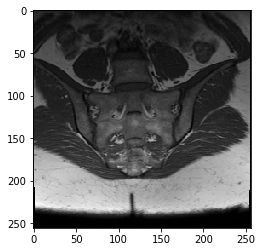

In [5]:
plt.imshow(img, cmap="gray")

# Slic

In [49]:
reload(slic)
model = slic.SLIC(K=2000, m=.01, thresh=1, maxit=5)


In [50]:
%%time
model.fit(img, False)

Current iteration: 1 / 5. Error: 2833.1264367780877
Current iteration: 2 / 5. Error: 1226.4523761818689
Current iteration: 3 / 5. Error: 541.779140044714
Current iteration: 4 / 5. Error: 243.73968841821448
Current iteration: 5 / 5. Error: 102.1957984455845
CPU times: user 19.9 s, sys: 220 ms, total: 20.1 s
Wall time: 19.8 s


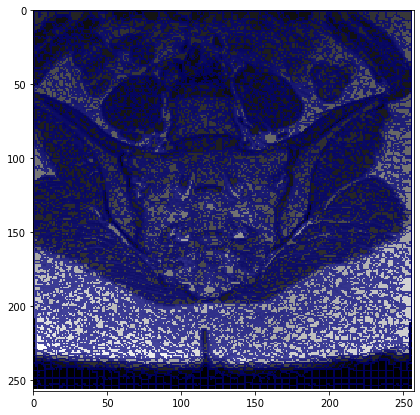

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
mask = model.pixel_labels
p.plot_img_mask_on_ax(ax, model.infer_superpixel_img(), model.infer_superpixel_edges())
# ax.scatter(np.stack(model.centers)[:, 2], np.stack(model.centers)[:, 1])

ax.set_xlim(0, 257);
ax.set_ylim(257, 0);

In [112]:
%%time
reload_modules()
sp1 = sp.SuperpixelImage(img, mask=morp.label(mask))

CPU times: user 2.83 s, sys: 7.43 ms, total: 2.84 s
Wall time: 2.84 s


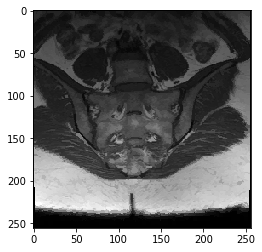

In [113]:
plt.imshow(sp1.array_means, cmap='gray')

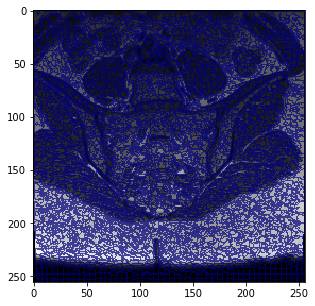

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
p.plot_img_mask_on_ax(ax, sp1.img_ini, sp1.infer_superpixel_edges())

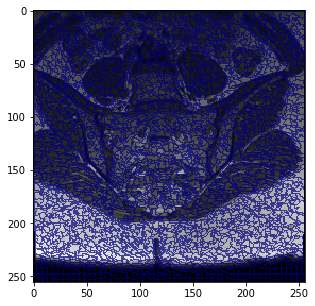

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
p.plot_img_mask_on_ax(ax, sp1.img_ini, sp1.infer_superpixel_edges())

In [115]:
%%time
changed = sp1.absorb_small(10);

CPU times: user 390 ms, sys: 0 ns, total: 390 ms
Wall time: 389 ms


In [116]:
len(sp1.superpixels)

2235

In [65]:
%%time
se = set(range(100))
for _ in range(1000000):
    iter(se).__next__()

CPU times: user 194 ms, sys: 0 ns, total: 194 ms
Wall time: 194 ms


In [74]:
class A:
    
    def __init__(self):
        self.v = [1, 2, 3]
        
    def get_v(self):
        return self.v

In [75]:
a = A()
l = a.get_v()
l.append(1)
a.v

[1, 2, 3, 1]

In [73]:
%%time
se = set(range(100))
for _ in range(1000000):
    item = se.pop()
    se.add(item)

CPU times: user 153 ms, sys: 0 ns, total: 153 ms
Wall time: 153 ms


In [57]:
import random

2704 6893


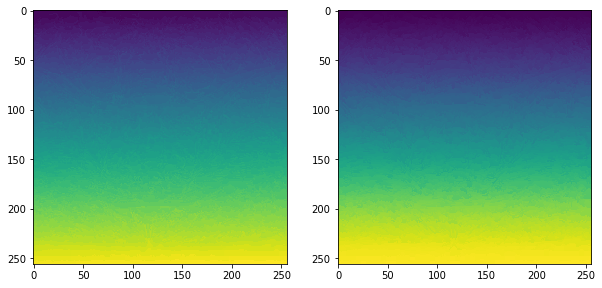

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(model.pixel_labels)
axs[1].imshow(morp.label(model.pixel_labels))

print(len(np.unique(model.pixel_labels)), len(np.unique(morp.label(model.pixel_labels))))

(array([36., 28., 14., 11.,  6.,  2.,  3.,  8.,  9.,  4.]),
 array([0.        , 0.08556108, 0.17112217, 0.25668325, 0.34224433,
        0.42780541, 0.5133665 , 0.59892758, 0.68448866, 0.77004974,
        0.85561083]),
 <a list of 10 Patch objects>)

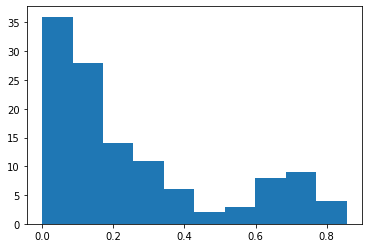

In [13]:
plt.hist(model.centers[:, 0])

(array([13574., 20220.,  9928.,  5973.,  2174.,  1411.,  4196.,  6051.,
         1794.,   215.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

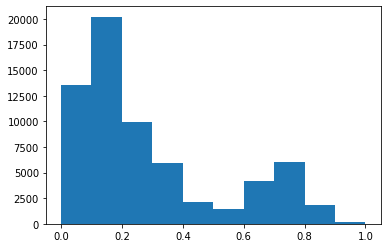

In [14]:
plt.hist(img[img==img])

In [59]:
im2 = model.infer_superpixel_img()

# My method

In [19]:
reload_modules()
model = hs.Hiersup(K=1000)

In [20]:
model.fit(img, mask=mask)

Computing weights 0.0016264915466308594
Step time: 0 
 Total loop time: 0 

Nb neighbors 5 
 Time to find weight: 8.58306884765625e-06 
 Time merge: 0.00011897087097167969 
 Time update: 1.3589859008789062e-05 



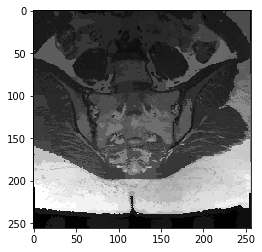

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow()
axs[1].imshow(model.superpixels.array_means, cmap='gray')

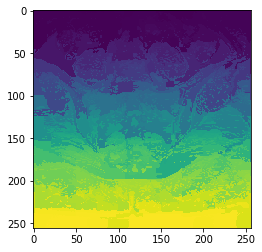

In [33]:
plt.imshow(morp.label(mask))

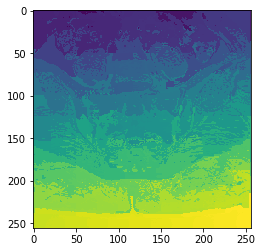

In [34]:
plt.imshow(mask)

In [31]:
morp

NameError: name 'morp' is not defined

In [27]:
(mask == 43)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
%%time
reload_modules()
sp1 = sp.SuperpixelImage(img, mask=mask)

CPU times: user 82.1 ms, sys: 16 ms, total: 98 ms
Wall time: 101 ms


In [10]:
%%time
sp1.compute_neighbors();

CPU times: user 91.6 ms, sys: 30 µs, total: 91.6 ms
Wall time: 90.7 ms


{1: {0, 2, 12, 13},
 0: {1, 11, 12},
 2: {1, 3, 12, 13, 14},
 3: {2, 4, 12, 14, 15},
 4: {3, 5, 14, 15, 16, 27},
 5: {4, 6, 15, 16, 27},
 6: {5, 7, 16, 17},
 7: {6, 8, 16, 17, 18, 20, 30},
 8: {7, 9, 18, 20},
 9: {8, 10, 20, 21},
 10: {9, 21, 32},
 12: {0, 1, 2, 3, 11, 13, 14, 22, 23, 24, 25, 34},
 13: {1, 2, 12, 14, 23, 24, 35, 36},
 14: {2, 3, 4, 12, 13, 15, 16, 24, 25, 26, 27, 36, 37},
 15: {3, 4, 5, 14, 16, 17, 25, 26, 27},
 16: {4, 5, 6, 7, 14, 15, 17, 26, 27, 28, 39, 40},
 17: {6, 7, 15, 16, 18, 26, 27, 28, 30, 38, 39, 40},
 18: {7, 8, 17, 19, 20, 28, 29, 30, 40},
 20: {7, 8, 9, 18, 19, 21, 30, 32, 42},
 21: {9, 10, 19, 20, 31, 32, 43},
 19: {18, 20, 21, 29, 30, 31, 32, 40, 42},
 11: {0, 12, 22},
 24: {12, 13, 14, 23, 25, 34, 35, 36, 46},
 27: {4, 5, 14, 15, 16, 17, 26, 28, 38, 39, 40, 50},
 30: {7, 17, 18, 19, 20, 28, 29, 31, 32, 40, 41, 42, 43, 52, 53},
 32: {10, 19, 20, 21, 30, 31, 41, 42, 43, 53},
 28: {16, 17, 18, 26, 27, 30, 38, 39, 40, 41},
 26: {14, 15, 16, 17, 25, 27, 28

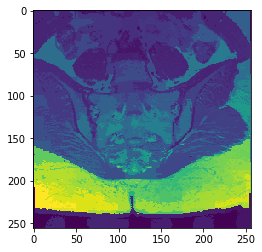

In [48]:
pix_lab = sp1.array_means
plt.imshow(pix_lab)

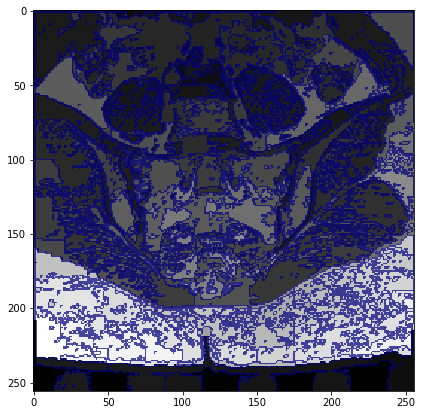

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
p.plot_img_mask_on_ax(ax, sp1.array_means, sp1.infer_superpixel_edges())

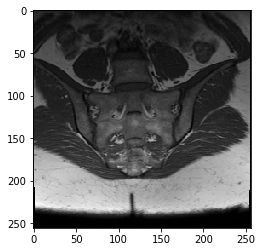

In [13]:
plt.imshow(img, cmap='gray')

In [15]:
mask

array([[  0,   0,   0, ...,  10,  10,  10],
       [  0,  12,  12, ...,  21,  21,  10],
       [  0,  12,  12, ...,  21,  21,  10],
       ...,
       [110, 110, 110, ..., 120, 120, 120],
       [110, 110, 110, ..., 120, 120, 120],
       [110, 110, 110, ..., 120, 120, 120]])